In [1]:
from lisa.utils import *

In [2]:
from lisa.library import *

In [3]:
import lisa.models

In [4]:
from numpy import array, zeros, argmin, inf, equal, ndim

In [5]:
from lisa.lists import *

In [5]:
import numpy.linalg

In [30]:
x

array([0, 0, 1, 1, 2, 4, 2, 1, 2, 0])

In [31]:
x.reshape(-1,1)

array([[0],
       [0],
       [1],
       [1],
       [2],
       [4],
       [2],
       [1],
       [2],
       [0]])

In [32]:
y = array([1, 1, 1, 2, 2, 2, 2, 3, 2, 0]).reshape(-1, 1)

In [10]:
y

array([[1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [3],
       [2],
       [0]])

In [15]:
x.reshape(-1, 1)

array([[0],
       [0],
       [1],
       [1],
       [2],
       [4],
       [2],
       [1],
       [2],
       [0]])

In [16]:
len_x, len_y = len(x), len(y)

In [17]:
D0 = zeros((len_x + 1, len_y + 1))

In [18]:
D0

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [19]:
D0[0, 1:] = inf
D0[1:, 0] = inf

In [20]:
D0

array([[  0.,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf],
       [ inf,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ inf,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ inf,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ inf,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ inf,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ inf,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ inf,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ inf,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ inf,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ inf,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [22]:
D1 = D0[1:, 1:]

In [23]:
D1

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [42]:
for i in range(len_x):
    for j in range(len_y):
        D1[i, j] = abs(x[i] - y[j])

In [43]:
D1

array([[ 1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  2.,  0.],
       [ 1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  2.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  1.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  2.],
       [ 3.,  3.,  3.,  2.,  2.,  2.,  2.,  1.,  2.,  4.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  2.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  1.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  1.,  1.,  2.,  2.,  2.,  2.,  3.,  2.,  0.]])

In [44]:
for i in range(len_x):
    for j in range(len_y):
        D1[i, j] += min(D0[i, j], D0[i, j + 1], D0[i + 1, j])

In [91]:
D1

array([[  1.,   2.,   3.,   5.,   7.,   9.,  11.,  14.,  16.,  16.],
       [  2.,   2.,   3.,   5.,   7.,   9.,  11.,  14.,  16.,  16.],
       [  2.,   2.,   2.,   3.,   4.,   5.,   6.,   8.,   9.,  10.],
       [  2.,   2.,   2.,   3.,   4.,   5.,   6.,   8.,   9.,  10.],
       [  3.,   3.,   3.,   2.,   2.,   2.,   2.,   3.,   3.,   5.],
       [  6.,   6.,   6.,   4.,   4.,   4.,   4.,   3.,   5.,   7.],
       [  7.,   7.,   7.,   4.,   4.,   4.,   4.,   4.,   3.,   5.],
       [  7.,   7.,   7.,   5.,   5.,   5.,   5.,   6.,   4.,   4.],
       [  8.,   8.,   8.,   5.,   5.,   5.,   5.,   6.,   4.,   6.],
       [  9.,   9.,   9.,   7.,   7.,   7.,   7.,   8.,   6.,   4.]])

In [92]:
D1[-1,-1]

4.0

In [94]:
sum(D1.shape)

20

In [46]:
D0

array([[  0.,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf],
       [ inf,   1.,   2.,   3.,   5.,   7.,   9.,  11.,  14.,  16.,  16.],
       [ inf,   2.,   2.,   3.,   5.,   7.,   9.,  11.,  14.,  16.,  16.],
       [ inf,   2.,   2.,   2.,   3.,   4.,   5.,   6.,   8.,   9.,  10.],
       [ inf,   2.,   2.,   2.,   3.,   4.,   5.,   6.,   8.,   9.,  10.],
       [ inf,   3.,   3.,   3.,   2.,   2.,   2.,   2.,   3.,   3.,   5.],
       [ inf,   6.,   6.,   6.,   4.,   4.,   4.,   4.,   3.,   5.,   7.],
       [ inf,   7.,   7.,   7.,   4.,   4.,   4.,   4.,   4.,   3.,   5.],
       [ inf,   7.,   7.,   7.,   5.,   5.,   5.,   5.,   6.,   4.,   4.],
       [ inf,   8.,   8.,   8.,   5.,   5.,   5.,   5.,   6.,   4.,   6.],
       [ inf,   9.,   9.,   9.,   7.,   7.,   7.,   7.,   8.,   6.,   4.]])

In [47]:
DM = D0.copy()

In [86]:
DM

array([[  0.,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf],
       [ inf,   1.,   2.,   3.,   5.,   7.,   9.,  11.,  14.,  16.,  16.],
       [ inf,   2.,   2.,   3.,   5.,   7.,   9.,  11.,  14.,  16.,  16.],
       [ inf,   2.,   2.,   2.,   3.,   4.,   5.,   6.,   8.,   9.,  10.],
       [ inf,   2.,   2.,   2.,   3.,   4.,   5.,   6.,   8.,   9.,  10.],
       [ inf,   3.,   3.,   3.,   2.,   2.,   2.,   2.,   3.,   3.,   5.],
       [ inf,   6.,   6.,   6.,   4.,   4.,   4.,   4.,   3.,   5.,   7.],
       [ inf,   7.,   7.,   7.,   4.,   4.,   4.,   4.,   4.,   3.,   5.],
       [ inf,   7.,   7.,   7.,   5.,   5.,   5.,   5.,   6.,   4.,   4.],
       [ inf,   8.,   8.,   8.,   5.,   5.,   5.,   5.,   6.,   4.,   6.],
       [ inf,   9.,   9.,   9.,   7.,   7.,   7.,   7.,   8.,   6.,   4.]])

In [55]:
def _traceback(D):
    i, j = array(D.shape) - 2
    p, q = [i], [j]
    while ((i > 0) or (j > 0)):
        tb = argmin((D[i, j], D[i, j+1], D[i+1, j]))
        if (tb == 0):
            i -= 1
            j -= 1
        elif (tb == 1):
            i -= 1
        else: # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return array(p), array(q)

In [56]:
p,q = _traceback(DM)

In [57]:
p

array([0, 1, 2, 3, 4, 4, 4, 4, 5, 6, 7, 8, 9])

In [58]:
q

array([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 9])

In [85]:
DM[10,9]

6.0

In [60]:
i, j

(9, 9)

In [61]:
p, q = [i], [j]

In [62]:
p, q

([9], [9])

In [63]:
DM[9,9]

4.0

In [79]:
x = array([0, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1,1)

In [78]:
y = array([1, 1, 1, 2, 2, 2, 2, 3, 2, 0]).reshape(-1,1)

In [77]:
dist, cost, acc, path = dtw(x, y, distance=lambda x, y: abs(x - y))

TypeError: 'NoneType' object is not iterable

In [80]:
len_x, len_y = len(x), len(y)

In [81]:
len_x

10

In [82]:
len_y

10

In [89]:
array([[2], [4], [0], [1] ]).reshape(-1,1)

array([[2],
       [4],
       [0],
       [1]])

In [6]:
import re

In [7]:
mylist = re.split('[°\'"]+', "36°57'")

In [8]:
mylist

['36', '57', '']

In [9]:
newlist = list(filter(bool, mylist))

In [10]:
newlist

['36', '57']

In [14]:
parse_dm("36°57'")

36.95

In [20]:
stations_not_set = Station.objects.filter(label=None)

In [21]:
stations_not_set.count()

4

In [22]:
for station in stations_not_set:
    print(station.name) 

TESTX1
TESTX2
TESTX3
TESTX4


In [5]:
haversine_distance(47.0333333333333, 7.28333333333333, 46.5, 7.56666666666667)

63.12803781794012

In [13]:
0.25**2

0.0625

In [10]:
import math 

In [14]:
sqrt(0.0625)

0.25

In [8]:
correlation_setting, created = Pearson.objects.get_or_create(algorithm=PEARSON, window_size=48, min_periods=None,
                                                             defaults={'algorithm' : PEARSON, 'window_size': 48, 'min_periods': None})

IntegrityError: (1048, "Column 'min_periods' cannot be null")

In [9]:
import numpy.random as npr
import numpy as np
import pylab

In [10]:
x = npr.normal(0,15,(10,2))
e = npr.normal(0,1,(10,2))
y = x + e

xa = []
t = np.array([0.0,0.0])
for i in x:
    t += i
    xa.append(t.copy())

ya = []
t = np.array([0.0,0.0])
for i in x + e:
    t += i
    ya.append(t.copy())


xa = np.array(xa)
ya = np.array(ya)


In [11]:
xa

array([[  7.52274219,  -2.06549112],
       [-23.21269078, -27.16366841],
       [ -6.77574166, -39.6213588 ],
       [ -2.90927186, -25.82781975],
       [-22.50488873, -18.28147894],
       [ -9.11852649, -58.45319217],
       [-26.38698135, -48.85160613],
       [-27.25304791, -61.3122743 ],
       [-28.57726687, -65.57331372],
       [-44.86574151, -82.61380821]])

/usr/local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"



Populating the interactive namespace from numpy and matplotlib


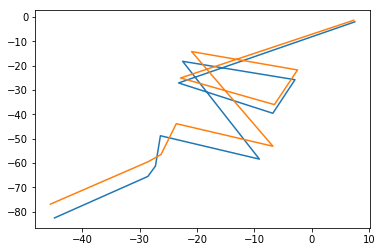

In [13]:
%pylab inline
pylab.plot(xa[:,0],xa[:,1])
pylab.plot(ya[:,0],ya[:,1])

In [1]:
import pydtw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
matplotlib.rcParams['figure.figsize'] = (12.0, 4.0)

ImportError: No module named 'pydtw'